In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Rajat/cardia_supervised_learning/cardia_main_dataset_updated.csv")

In [34]:
!pip install tensorflow==1.14
    

  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/35/39/ceabe8fa912cb27ec9a0064fe01c1fde2f8b43e9f7e506207db0a0dcea0a/h5py-3.1.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/48/19/f2090f7dad41e225c7f2326e4cfe6fff49e57dedb5b53636c9551f86b069/cached_property-1.5.2-py2.py3-none-any.whl
  Found existing installat

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\users\\rajat paliwal\\anaconda\\lib\\site-packages\\~ensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
grade_raw = df['Grade']
print(grade_raw)

0      A
1      C
2      D
3      D
4      A
      ..
244    B
245    C
246    C
247    B
248    B
Name: Grade, Length: 249, dtype: object


In [3]:
df.drop(['Grade'], axis=1, inplace = True)
df.head()

,Opening_Size,Time_Taken,Number_of_collisions
0,0.045034,13.535900,0
1,0.045251,18.450730,4
2,0.045583,25.961040,11
3,0.044937,5.992819,8
4,0.045347,7.917220,1


In [4]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
le = LabelEncoder()
le.fit(grade_raw)
#Encode the 'grade_raw' data to numerical values
grade = le.transform(grade_raw)
display(grade)

array([0, 2, 3, 3, 0, 3, 2, 2, 0, 2, 0, 3, 3, 0, 2, 0, 2, 1, 2, 1, 2, 3,
       3, 1, 3, 1, 0, 3, 2, 3, 1, 3, 1, 0, 3, 3, 3, 2, 3, 3, 3, 1, 3, 2,
       1, 2, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 0, 1, 1, 3, 1, 2, 2, 2, 1, 2,
       3, 0, 3, 2, 2, 2, 1, 3, 2, 0, 3, 0, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2,
       2, 3, 3, 1, 3, 3, 0, 3, 3, 2, 2, 3, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1,
       0, 3, 2, 2, 2, 1, 3, 3, 0, 3, 3, 3, 2, 0, 3, 0, 3, 3, 0, 2, 3, 3,
       3, 3, 3, 0, 1, 2, 3, 0, 0, 1, 1, 2, 3, 2, 0, 3, 3, 2, 3, 0, 0, 0,
       1, 0, 3, 3, 3, 3, 2, 2, 3, 3, 1, 0, 2, 2, 3, 1, 2, 2, 1, 3, 0, 3,
       1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 3, 1, 0, 2, 1, 1, 1, 3, 2,
       0, 3, 3, 2, 3, 1, 3, 1, 0, 2, 1, 3, 2, 2, 3, 0, 1, 3, 3, 0, 1, 0,
       2, 1, 2, 2, 0, 1, 2, 3, 3, 2, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 1, 2, 2, 1, 1])

In [5]:
#merging transformed grade columns back to the dataset
ga= pd.Series(grade)
df['grade']=ga
display(df)

,Opening_Size,Time_Taken,Number_of_collisions,grade
0,0.045034,13.535900,0,0
1,0.045251,18.450730,4,2
2,0.045583,25.961040,11,3
3,0.044937,5.992819,8,3
4,0.045347,7.917220,1,0
...,...,...,...,...
244,0.045031,25.075000,3,1
245,0.044919,30.246000,5,2
246,0.045678,18.640000,7,2
247,0.044813,11.893000,2,1


In [6]:
#encoding all continuous features to equally sized bins
TIME_TAKEN_MIN = df["Time_Taken"].min()
TIME_TAKEN_MAX = df["Time_Taken"].max()
print('Min and max ',TIME_TAKEN_MIN,TIME_TAKEN_MAX)

N_O_C_MIN = df['Number_of_collisions'].min()
N_O_C_MAX = df['Number_of_collisions'].max()
print('Min and max number of collision',N_O_C_MIN,N_O_C_MAX)


Min and max  4.038 35.986999999999995
Min and max number of collision 0 11


In [7]:
from sklearn.preprocessing import PowerTransformer
df[df.columns] = PowerTransformer(method = 'yeo-johnson', standardize = True, copy = True).fit_transform(df[df.columns])
print(df)



     Opening_Size  Time_Taken  Number_of_collisions     grade
0        0.141928   -0.573027             -1.715685 -1.535407
1        0.518903   -0.000998             -0.223540  0.247366
2        1.086218    0.756681              1.484642  1.186005
3       -0.027688   -1.669649              0.818051  1.186005
4        0.683921   -1.352136             -1.248493 -1.535407
..            ...         ...                   ...       ...
244      0.137698    0.672868             -0.529317 -0.664131
245     -0.059179    1.145226              0.059819  0.247366
246      1.245023    0.019607              0.577751  0.247366
247     -0.246614   -0.783677             -0.865777 -0.664131
248      1.503838   -0.499704             -0.223540 -0.664131

[249 rows x 4 columns]


In [8]:
import matplotlib.pyplot as plt
columns = df.columns
x_data = range(0,df.shape[0])

fig,ax = plt.subplots()

for column in columns:
    ax.plot(x_data, df[column],label=column)
ax.set_title('Cardia dataset')
ax.legend()


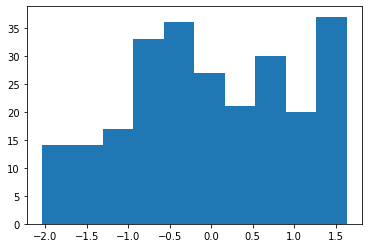

In [9]:

plt.hist(df['Time_Taken'])

plt.show()

In [18]:
!pip install seaborn

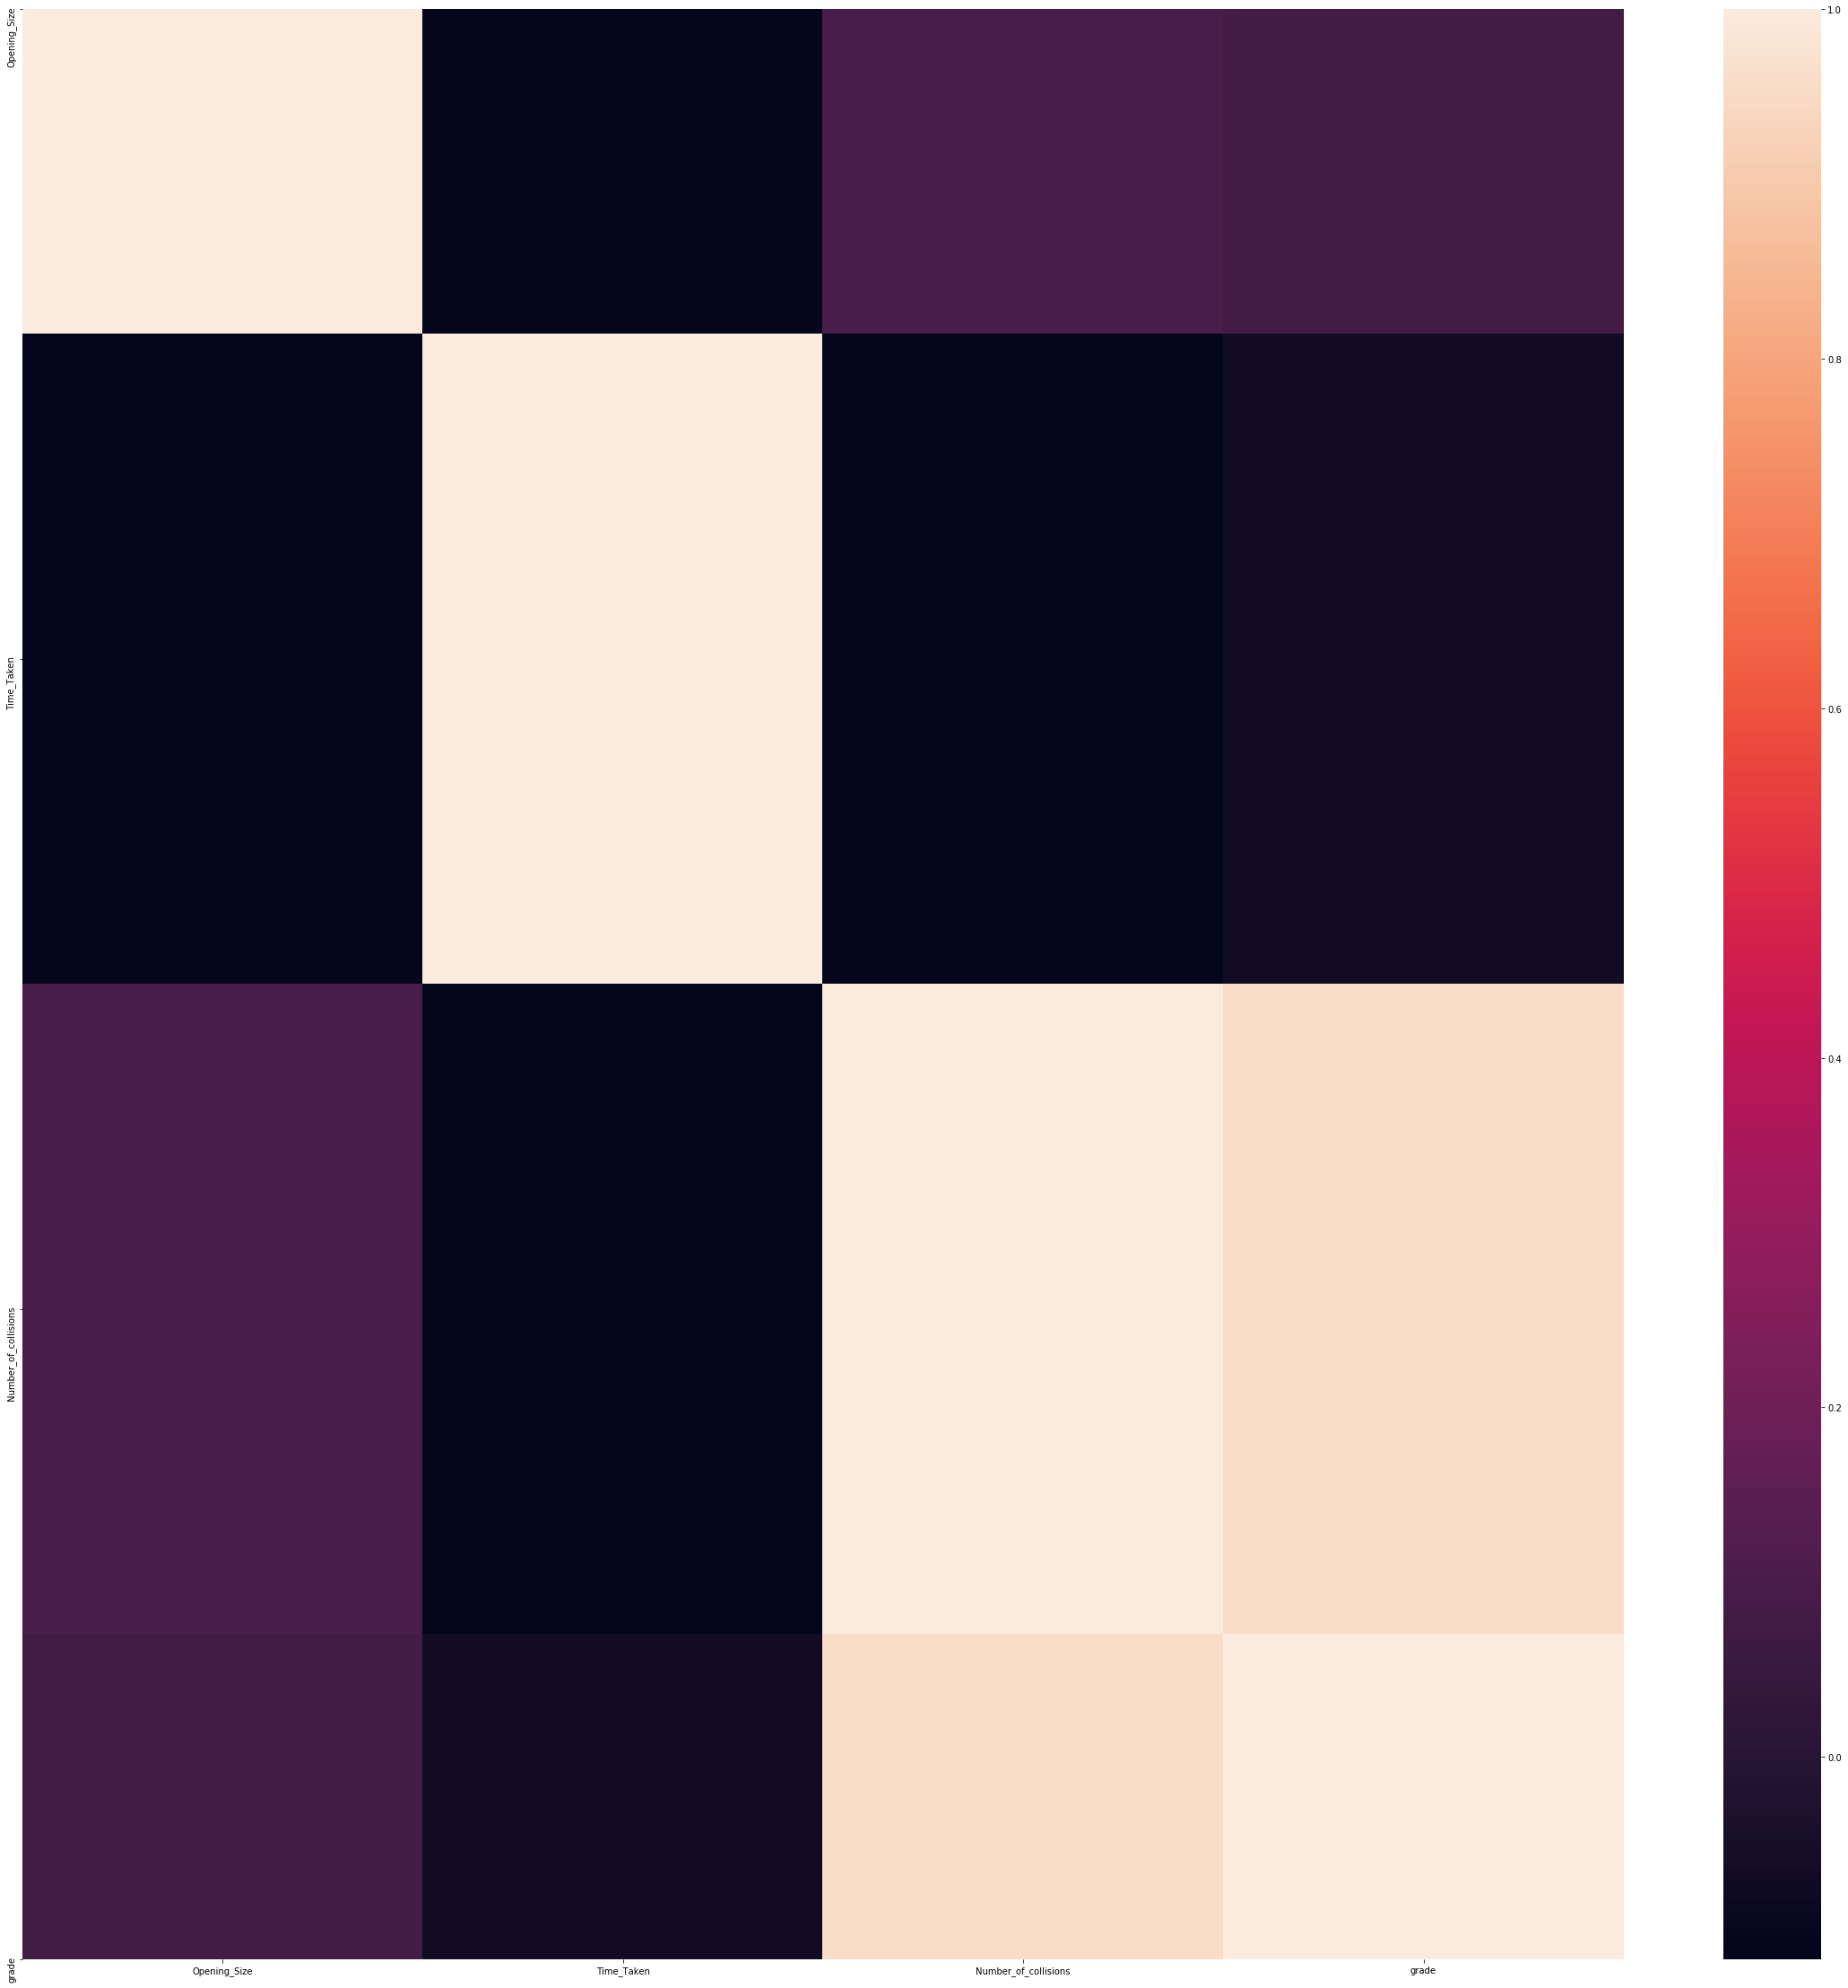

In [10]:
import seaborn as sns
import pandas as pd
plt.figure(figsize=(40,40)) 
sns.heatmap(df.corr())

The model code is taken from the notebook https://www.maskaravivek.com/post/gan-synthetic-data-generation/


In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam

class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict(noise, steps=1)
    
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)
    
            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
    
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                #Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model_normalized/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                #Here is generating the data
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return
    
    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

D:\Users\Rajat Paliwal\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\Rajat Paliwal\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\Rajat Paliwal\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\Rajat Paliwal\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.

In [12]:
data_cols = df.columns

In [13]:
#Defining GAN and training parameters
noise_dim = 32
dim =128
batch_size= 32

log_step=100
epochs = 5000+1
learning_rate = 5e-3
models_dir = 'model_normalized'
df[data_cols] = df[data_cols]

print(df.shape[1])

gan_args= [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args=['',epochs,log_step]

4


In [14]:
!mkdir model_normalized

A subdirectory or file model_normalized already exists.


In [15]:
model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)


W0120 16:33:48.587285 46700 deprecation.py:506] From D:\Users\Rajat Paliwal\anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0120 16:33:48.734289 46700 deprecation.py:323] From D:\Users\Rajat Paliwal\anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0120 16:33:49.122006 46700 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0120 16:33:49.490914 46700 training.py:2197] Di

0 [D loss: 0.782669, acc.: 1.56%] [G loss: 0.657153]
generated_data
1 [D loss: 1.584687, acc.: 50.00%] [G loss: 0.521172]
2 [D loss: 0.942858, acc.: 50.00%] [G loss: 1.317527]
3 [D loss: 0.570596, acc.: 67.19%] [G loss: 1.339733]
4 [D loss: 0.512055, acc.: 82.81%] [G loss: 0.860500]
5 [D loss: 0.773387, acc.: 37.50%] [G loss: 0.632441]
6 [D loss: 0.625816, acc.: 37.50%] [G loss: 0.649213]
7 [D loss: 0.637373, acc.: 42.19%] [G loss: 0.649436]
8 [D loss: 0.689148, acc.: 50.00%] [G loss: 0.714749]
9 [D loss: 0.643344, acc.: 48.44%] [G loss: 1.087984]
10 [D loss: 0.484560, acc.: 90.62%] [G loss: 0.950164]
11 [D loss: 0.833787, acc.: 53.12%] [G loss: 0.708685]
12 [D loss: 0.897045, acc.: 40.62%] [G loss: 1.137994]
13 [D loss: 0.564645, acc.: 75.00%] [G loss: 0.893609]
14 [D loss: 0.592622, acc.: 48.44%] [G loss: 0.758677]
15 [D loss: 0.556559, acc.: 45.31%] [G loss: 0.750656]
16 [D loss: 0.728578, acc.: 45.31%] [G loss: 0.694115]
17 [D loss: 1.261951, acc.: 43.75%] [G loss: 0.697162]
18 [D 

148 [D loss: 0.629032, acc.: 73.44%] [G loss: 1.222682]
149 [D loss: 0.726329, acc.: 54.69%] [G loss: 0.970997]
150 [D loss: 0.685989, acc.: 62.50%] [G loss: 1.231515]
151 [D loss: 0.653313, acc.: 67.19%] [G loss: 1.184590]
152 [D loss: 0.640131, acc.: 62.50%] [G loss: 1.333449]
153 [D loss: 0.573631, acc.: 65.62%] [G loss: 1.501934]
154 [D loss: 0.547083, acc.: 65.62%] [G loss: 1.565802]
155 [D loss: 0.587842, acc.: 68.75%] [G loss: 1.213704]
156 [D loss: 0.507654, acc.: 70.31%] [G loss: 1.426446]
157 [D loss: 0.468029, acc.: 65.62%] [G loss: 1.844999]
158 [D loss: 0.446409, acc.: 70.31%] [G loss: 1.678825]
159 [D loss: 0.451639, acc.: 71.88%] [G loss: 1.664651]
160 [D loss: 0.649833, acc.: 54.69%] [G loss: 1.816176]
161 [D loss: 0.581745, acc.: 60.94%] [G loss: 1.476951]
162 [D loss: 0.454458, acc.: 73.44%] [G loss: 1.974498]
163 [D loss: 0.432423, acc.: 75.00%] [G loss: 2.056579]
164 [D loss: 0.459903, acc.: 76.56%] [G loss: 1.683367]
165 [D loss: 0.459127, acc.: 68.75%] [G loss: 2.

295 [D loss: 0.427348, acc.: 81.25%] [G loss: 1.797058]
296 [D loss: 0.831475, acc.: 65.62%] [G loss: 4.016474]
297 [D loss: 0.327363, acc.: 85.94%] [G loss: 3.145649]
298 [D loss: 0.397116, acc.: 84.38%] [G loss: 2.517759]
299 [D loss: 0.328638, acc.: 87.50%] [G loss: 2.692521]
300 [D loss: 0.328864, acc.: 89.06%] [G loss: 2.535692]
generated_data
301 [D loss: 0.378598, acc.: 84.38%] [G loss: 3.012503]
302 [D loss: 0.565012, acc.: 68.75%] [G loss: 3.305153]
303 [D loss: 0.454899, acc.: 81.25%] [G loss: 4.206681]
304 [D loss: 0.448915, acc.: 84.38%] [G loss: 1.977914]
305 [D loss: 0.328868, acc.: 89.06%] [G loss: 2.242931]
306 [D loss: 0.644973, acc.: 76.56%] [G loss: 1.648337]
307 [D loss: 0.330271, acc.: 92.19%] [G loss: 2.197561]
308 [D loss: 0.322648, acc.: 89.06%] [G loss: 3.616290]
309 [D loss: 0.484494, acc.: 78.12%] [G loss: 2.366764]
310 [D loss: 0.382705, acc.: 90.62%] [G loss: 2.022254]
311 [D loss: 0.313991, acc.: 87.50%] [G loss: 2.036041]
312 [D loss: 0.329560, acc.: 84.3

441 [D loss: 0.540764, acc.: 78.12%] [G loss: 1.861386]
442 [D loss: 0.483950, acc.: 75.00%] [G loss: 1.299755]
443 [D loss: 0.484826, acc.: 79.69%] [G loss: 1.293582]
444 [D loss: 0.459823, acc.: 81.25%] [G loss: 1.575886]
445 [D loss: 0.505399, acc.: 76.56%] [G loss: 1.530558]
446 [D loss: 0.474663, acc.: 75.00%] [G loss: 1.366910]
447 [D loss: 0.422185, acc.: 79.69%] [G loss: 1.273202]
448 [D loss: 0.433132, acc.: 79.69%] [G loss: 1.293452]
449 [D loss: 0.427157, acc.: 78.12%] [G loss: 1.544943]
450 [D loss: 0.424384, acc.: 78.12%] [G loss: 1.275235]
451 [D loss: 0.454068, acc.: 79.69%] [G loss: 1.435549]
452 [D loss: 0.412322, acc.: 81.25%] [G loss: 1.505256]
453 [D loss: 0.425062, acc.: 81.25%] [G loss: 1.636017]
454 [D loss: 0.394792, acc.: 81.25%] [G loss: 1.533786]
455 [D loss: 0.487532, acc.: 79.69%] [G loss: 1.320164]
456 [D loss: 0.389373, acc.: 81.25%] [G loss: 2.236711]
457 [D loss: 0.444075, acc.: 79.69%] [G loss: 1.589727]
458 [D loss: 0.423830, acc.: 78.12%] [G loss: 1.

588 [D loss: 0.426892, acc.: 79.69%] [G loss: 1.397230]
589 [D loss: 0.478880, acc.: 73.44%] [G loss: 1.311613]
590 [D loss: 0.406838, acc.: 78.12%] [G loss: 1.813528]
591 [D loss: 0.454785, acc.: 78.12%] [G loss: 1.599114]
592 [D loss: 0.417813, acc.: 82.81%] [G loss: 1.467559]
593 [D loss: 0.390242, acc.: 79.69%] [G loss: 1.703181]
594 [D loss: 0.449592, acc.: 75.00%] [G loss: 1.508651]
595 [D loss: 0.407976, acc.: 76.56%] [G loss: 1.732248]
596 [D loss: 0.451370, acc.: 76.56%] [G loss: 1.415988]
597 [D loss: 0.370568, acc.: 82.81%] [G loss: 1.558134]
598 [D loss: 0.435280, acc.: 76.56%] [G loss: 1.314381]
599 [D loss: 0.412102, acc.: 81.25%] [G loss: 1.334213]
600 [D loss: 0.403528, acc.: 81.25%] [G loss: 1.455637]
generated_data
601 [D loss: 0.397851, acc.: 81.25%] [G loss: 1.459379]
602 [D loss: 0.367261, acc.: 82.81%] [G loss: 1.654097]
603 [D loss: 0.455569, acc.: 78.12%] [G loss: 1.569011]
604 [D loss: 0.371158, acc.: 82.81%] [G loss: 2.109846]
605 [D loss: 0.356848, acc.: 81.2

734 [D loss: 0.432506, acc.: 78.12%] [G loss: 1.408524]
735 [D loss: 0.398443, acc.: 79.69%] [G loss: 1.490844]
736 [D loss: 0.418182, acc.: 78.12%] [G loss: 1.489144]
737 [D loss: 0.380843, acc.: 79.69%] [G loss: 1.602739]
738 [D loss: 0.395625, acc.: 78.12%] [G loss: 1.704334]
739 [D loss: 0.391711, acc.: 82.81%] [G loss: 1.539449]
740 [D loss: 0.420936, acc.: 81.25%] [G loss: 1.410123]
741 [D loss: 0.402079, acc.: 82.81%] [G loss: 1.302248]
742 [D loss: 0.397661, acc.: 81.25%] [G loss: 1.517713]
743 [D loss: 0.412850, acc.: 84.38%] [G loss: 1.456490]
744 [D loss: 0.521871, acc.: 79.69%] [G loss: 1.434074]
745 [D loss: 0.437592, acc.: 79.69%] [G loss: 1.498962]
746 [D loss: 0.441282, acc.: 82.81%] [G loss: 1.596296]
747 [D loss: 0.441227, acc.: 81.25%] [G loss: 1.714526]
748 [D loss: 0.418679, acc.: 79.69%] [G loss: 1.653827]
749 [D loss: 0.421679, acc.: 78.12%] [G loss: 1.500868]
750 [D loss: 0.404568, acc.: 81.25%] [G loss: 1.538126]
751 [D loss: 0.407400, acc.: 81.25%] [G loss: 1.

881 [D loss: 0.441351, acc.: 81.25%] [G loss: 1.526842]
882 [D loss: 0.462391, acc.: 71.88%] [G loss: 1.521212]
883 [D loss: 0.415193, acc.: 79.69%] [G loss: 1.472659]
884 [D loss: 0.469907, acc.: 76.56%] [G loss: 1.425730]
885 [D loss: 0.421659, acc.: 79.69%] [G loss: 1.470972]
886 [D loss: 0.459836, acc.: 76.56%] [G loss: 1.861079]
887 [D loss: 0.416851, acc.: 82.81%] [G loss: 1.557976]
888 [D loss: 0.451523, acc.: 81.25%] [G loss: 1.883944]
889 [D loss: 0.437297, acc.: 82.81%] [G loss: 1.602045]
890 [D loss: 0.486786, acc.: 76.56%] [G loss: 1.495497]
891 [D loss: 0.419525, acc.: 79.69%] [G loss: 1.612021]
892 [D loss: 0.400816, acc.: 82.81%] [G loss: 1.799502]
893 [D loss: 0.436777, acc.: 75.00%] [G loss: 1.658241]
894 [D loss: 0.428084, acc.: 78.12%] [G loss: 1.461784]
895 [D loss: 0.445584, acc.: 73.44%] [G loss: 1.642759]
896 [D loss: 0.425377, acc.: 78.12%] [G loss: 1.516511]
897 [D loss: 0.427544, acc.: 75.00%] [G loss: 1.774115]
898 [D loss: 0.452875, acc.: 79.69%] [G loss: 1.

1027 [D loss: 0.367280, acc.: 84.38%] [G loss: 1.887149]
1028 [D loss: 0.368908, acc.: 85.94%] [G loss: 1.774488]
1029 [D loss: 0.415485, acc.: 81.25%] [G loss: 1.680089]
1030 [D loss: 0.445445, acc.: 82.81%] [G loss: 1.561959]
1031 [D loss: 0.364749, acc.: 85.94%] [G loss: 1.819565]
1032 [D loss: 0.353219, acc.: 84.38%] [G loss: 1.566862]
1033 [D loss: 0.361465, acc.: 84.38%] [G loss: 1.594715]
1034 [D loss: 0.403599, acc.: 84.38%] [G loss: 1.899344]
1035 [D loss: 0.345758, acc.: 87.50%] [G loss: 1.681381]
1036 [D loss: 0.314719, acc.: 85.94%] [G loss: 3.642350]
1037 [D loss: 0.293402, acc.: 87.50%] [G loss: 2.380115]
1038 [D loss: 0.321191, acc.: 87.50%] [G loss: 2.882882]
1039 [D loss: 0.470473, acc.: 75.00%] [G loss: 2.226566]
1040 [D loss: 0.444564, acc.: 82.81%] [G loss: 1.568676]
1041 [D loss: 0.415078, acc.: 76.56%] [G loss: 3.307015]
1042 [D loss: 0.586657, acc.: 79.69%] [G loss: 1.893652]
1043 [D loss: 0.299563, acc.: 90.62%] [G loss: 1.717960]
1044 [D loss: 0.302302, acc.: 8

1171 [D loss: 0.356737, acc.: 84.38%] [G loss: 1.949776]
1172 [D loss: 0.330297, acc.: 84.38%] [G loss: 2.067394]
1173 [D loss: 0.338440, acc.: 85.94%] [G loss: 2.787989]
1174 [D loss: 0.400500, acc.: 82.81%] [G loss: 2.070574]
1175 [D loss: 0.355729, acc.: 84.38%] [G loss: 1.636883]
1176 [D loss: 0.345173, acc.: 82.81%] [G loss: 2.274448]
1177 [D loss: 0.347932, acc.: 85.94%] [G loss: 2.182033]
1178 [D loss: 0.419065, acc.: 76.56%] [G loss: 1.529433]
1179 [D loss: 0.389372, acc.: 84.38%] [G loss: 1.853313]
1180 [D loss: 0.386277, acc.: 85.94%] [G loss: 1.664997]
1181 [D loss: 0.357573, acc.: 85.94%] [G loss: 1.678328]
1182 [D loss: 0.376908, acc.: 81.25%] [G loss: 1.690130]
1183 [D loss: 0.377943, acc.: 82.81%] [G loss: 2.049260]
1184 [D loss: 0.359384, acc.: 87.50%] [G loss: 1.766011]
1185 [D loss: 0.312060, acc.: 87.50%] [G loss: 1.988957]
1186 [D loss: 0.401414, acc.: 79.69%] [G loss: 2.169800]
1187 [D loss: 0.287736, acc.: 87.50%] [G loss: 1.842632]
1188 [D loss: 0.307684, acc.: 8

1315 [D loss: 0.277656, acc.: 90.62%] [G loss: 2.475438]
1316 [D loss: 0.269913, acc.: 90.62%] [G loss: 2.530692]
1317 [D loss: 0.242947, acc.: 90.62%] [G loss: 2.309122]
1318 [D loss: 0.256833, acc.: 90.62%] [G loss: 2.422087]
1319 [D loss: 0.260543, acc.: 87.50%] [G loss: 2.340240]
1320 [D loss: 0.211762, acc.: 92.19%] [G loss: 2.351045]
1321 [D loss: 0.263762, acc.: 90.62%] [G loss: 2.705742]
1322 [D loss: 0.292194, acc.: 87.50%] [G loss: 2.532832]
1323 [D loss: 0.234544, acc.: 90.62%] [G loss: 2.583176]
1324 [D loss: 0.263712, acc.: 92.19%] [G loss: 2.105427]
1325 [D loss: 0.213915, acc.: 92.19%] [G loss: 2.495200]
1326 [D loss: 0.266007, acc.: 90.62%] [G loss: 2.339395]
1327 [D loss: 0.288825, acc.: 84.38%] [G loss: 2.447676]
1328 [D loss: 0.213379, acc.: 92.19%] [G loss: 2.597376]
1329 [D loss: 0.336654, acc.: 87.50%] [G loss: 2.701545]
1330 [D loss: 0.211142, acc.: 90.62%] [G loss: 2.732720]
1331 [D loss: 0.262689, acc.: 90.62%] [G loss: 2.378183]
1332 [D loss: 0.412878, acc.: 8

1459 [D loss: 0.295462, acc.: 85.94%] [G loss: 2.795729]
1460 [D loss: 0.234390, acc.: 93.75%] [G loss: 2.230621]
1461 [D loss: 0.246924, acc.: 92.19%] [G loss: 2.378372]
1462 [D loss: 0.251513, acc.: 90.62%] [G loss: 2.236829]
1463 [D loss: 0.269945, acc.: 90.62%] [G loss: 1.862356]
1464 [D loss: 0.302371, acc.: 89.06%] [G loss: 2.699636]
1465 [D loss: 0.339701, acc.: 82.81%] [G loss: 2.763127]
1466 [D loss: 0.266759, acc.: 89.06%] [G loss: 2.794716]
1467 [D loss: 0.301639, acc.: 87.50%] [G loss: 2.116803]
1468 [D loss: 0.249549, acc.: 90.62%] [G loss: 2.585181]
1469 [D loss: 0.200954, acc.: 93.75%] [G loss: 2.516332]
1470 [D loss: 0.250156, acc.: 90.62%] [G loss: 2.430470]
1471 [D loss: 0.213924, acc.: 92.19%] [G loss: 2.560536]
1472 [D loss: 0.301932, acc.: 92.19%] [G loss: 2.338121]
1473 [D loss: 0.218870, acc.: 92.19%] [G loss: 2.808017]
1474 [D loss: 0.249790, acc.: 90.62%] [G loss: 2.454618]
1475 [D loss: 0.250574, acc.: 92.19%] [G loss: 2.689445]
1476 [D loss: 0.299919, acc.: 8

1603 [D loss: 0.318246, acc.: 84.38%] [G loss: 2.193417]
1604 [D loss: 0.284918, acc.: 87.50%] [G loss: 2.188701]
1605 [D loss: 0.276685, acc.: 89.06%] [G loss: 2.354697]
1606 [D loss: 0.276585, acc.: 89.06%] [G loss: 2.759042]
1607 [D loss: 0.233355, acc.: 92.19%] [G loss: 2.473921]
1608 [D loss: 0.238482, acc.: 89.06%] [G loss: 2.110495]
1609 [D loss: 0.215749, acc.: 90.62%] [G loss: 2.733705]
1610 [D loss: 0.227890, acc.: 90.62%] [G loss: 2.479033]
1611 [D loss: 0.236875, acc.: 93.75%] [G loss: 2.465462]
1612 [D loss: 0.272151, acc.: 89.06%] [G loss: 2.498062]
1613 [D loss: 0.283227, acc.: 90.62%] [G loss: 2.341334]
1614 [D loss: 0.261700, acc.: 89.06%] [G loss: 2.216691]
1615 [D loss: 0.240548, acc.: 90.62%] [G loss: 2.166751]
1616 [D loss: 0.232018, acc.: 93.75%] [G loss: 2.651108]
1617 [D loss: 0.206106, acc.: 90.62%] [G loss: 2.538128]
1618 [D loss: 0.228117, acc.: 92.19%] [G loss: 2.686367]
1619 [D loss: 0.289339, acc.: 89.06%] [G loss: 2.100460]
1620 [D loss: 0.281475, acc.: 9

1747 [D loss: 0.220508, acc.: 93.75%] [G loss: 2.251842]
1748 [D loss: 0.262457, acc.: 90.62%] [G loss: 2.639038]
1749 [D loss: 0.198574, acc.: 90.62%] [G loss: 2.581028]
1750 [D loss: 0.224968, acc.: 92.19%] [G loss: 2.564567]
1751 [D loss: 0.207805, acc.: 90.62%] [G loss: 2.559972]
1752 [D loss: 0.205832, acc.: 92.19%] [G loss: 2.612506]
1753 [D loss: 0.232824, acc.: 87.50%] [G loss: 2.721044]
1754 [D loss: 0.218706, acc.: 92.19%] [G loss: 2.701048]
1755 [D loss: 0.212187, acc.: 92.19%] [G loss: 2.538453]
1756 [D loss: 0.221536, acc.: 92.19%] [G loss: 2.475906]
1757 [D loss: 0.191740, acc.: 92.19%] [G loss: 2.447106]
1758 [D loss: 0.230514, acc.: 92.19%] [G loss: 2.424411]
1759 [D loss: 0.193408, acc.: 93.75%] [G loss: 2.387235]
1760 [D loss: 0.192449, acc.: 92.19%] [G loss: 2.367044]
1761 [D loss: 0.241094, acc.: 92.19%] [G loss: 2.322003]
1762 [D loss: 0.196581, acc.: 93.75%] [G loss: 2.589501]
1763 [D loss: 0.181802, acc.: 93.75%] [G loss: 2.624104]
1764 [D loss: 0.155100, acc.: 9

1891 [D loss: 0.204356, acc.: 90.62%] [G loss: 2.480477]
1892 [D loss: 0.177806, acc.: 95.31%] [G loss: 2.371864]
1893 [D loss: 0.184162, acc.: 95.31%] [G loss: 2.482027]
1894 [D loss: 0.182372, acc.: 95.31%] [G loss: 2.451967]
1895 [D loss: 0.180786, acc.: 95.31%] [G loss: 2.537871]
1896 [D loss: 0.207962, acc.: 92.19%] [G loss: 2.383186]
1897 [D loss: 0.196273, acc.: 95.31%] [G loss: 2.536108]
1898 [D loss: 0.217752, acc.: 89.06%] [G loss: 3.028764]
1899 [D loss: 0.182395, acc.: 93.75%] [G loss: 2.530816]
1900 [D loss: 0.246133, acc.: 90.62%] [G loss: 2.455414]
generated_data
1901 [D loss: 0.199894, acc.: 93.75%] [G loss: 2.370876]
1902 [D loss: 0.203551, acc.: 93.75%] [G loss: 2.244652]
1903 [D loss: 0.207085, acc.: 92.19%] [G loss: 2.472179]
1904 [D loss: 0.201366, acc.: 90.62%] [G loss: 2.424190]
1905 [D loss: 0.195829, acc.: 93.75%] [G loss: 2.421867]
1906 [D loss: 0.257742, acc.: 90.62%] [G loss: 2.486634]
1907 [D loss: 0.170425, acc.: 95.31%] [G loss: 2.435342]
1908 [D loss: 0.

2035 [D loss: 0.298144, acc.: 89.06%] [G loss: 3.199163]
2036 [D loss: 0.305626, acc.: 85.94%] [G loss: 2.798982]
2037 [D loss: 0.344950, acc.: 87.50%] [G loss: 2.164278]
2038 [D loss: 0.253732, acc.: 89.06%] [G loss: 2.376343]
2039 [D loss: 0.185121, acc.: 92.19%] [G loss: 2.433676]
2040 [D loss: 0.208313, acc.: 92.19%] [G loss: 2.412506]
2041 [D loss: 0.241091, acc.: 87.50%] [G loss: 2.710569]
2042 [D loss: 0.192974, acc.: 93.75%] [G loss: 2.129720]
2043 [D loss: 0.196945, acc.: 93.75%] [G loss: 2.513119]
2044 [D loss: 0.219610, acc.: 92.19%] [G loss: 2.617347]
2045 [D loss: 0.216648, acc.: 90.62%] [G loss: 3.721528]
2046 [D loss: 0.191275, acc.: 93.75%] [G loss: 3.119379]
2047 [D loss: 0.182459, acc.: 93.75%] [G loss: 2.360706]
2048 [D loss: 0.221956, acc.: 90.62%] [G loss: 2.428025]
2049 [D loss: 0.181106, acc.: 92.19%] [G loss: 2.676489]
2050 [D loss: 0.243037, acc.: 89.06%] [G loss: 2.502504]
2051 [D loss: 0.203053, acc.: 93.75%] [G loss: 2.784083]
2052 [D loss: 0.238392, acc.: 9

2179 [D loss: 0.270044, acc.: 89.06%] [G loss: 2.246284]
2180 [D loss: 0.253133, acc.: 90.62%] [G loss: 3.089977]
2181 [D loss: 0.231987, acc.: 92.19%] [G loss: 2.508010]
2182 [D loss: 0.245777, acc.: 89.06%] [G loss: 4.828025]
2183 [D loss: 0.219487, acc.: 92.19%] [G loss: 2.193303]
2184 [D loss: 0.244487, acc.: 89.06%] [G loss: 2.371614]
2185 [D loss: 0.210910, acc.: 92.19%] [G loss: 2.247236]
2186 [D loss: 0.201294, acc.: 92.19%] [G loss: 2.271966]
2187 [D loss: 0.218172, acc.: 93.75%] [G loss: 2.241119]
2188 [D loss: 0.221753, acc.: 92.19%] [G loss: 2.534936]
2189 [D loss: 0.254868, acc.: 90.62%] [G loss: 2.296501]
2190 [D loss: 0.222930, acc.: 92.19%] [G loss: 2.280246]
2191 [D loss: 0.227992, acc.: 89.06%] [G loss: 2.363784]
2192 [D loss: 0.208567, acc.: 95.31%] [G loss: 2.433797]
2193 [D loss: 0.239503, acc.: 89.06%] [G loss: 2.411150]
2194 [D loss: 0.206763, acc.: 92.19%] [G loss: 2.394477]
2195 [D loss: 0.209851, acc.: 92.19%] [G loss: 2.432372]
2196 [D loss: 0.284373, acc.: 8

2323 [D loss: 0.233258, acc.: 92.19%] [G loss: 2.263720]
2324 [D loss: 0.197036, acc.: 93.75%] [G loss: 2.254171]
2325 [D loss: 0.253491, acc.: 89.06%] [G loss: 2.359827]
2326 [D loss: 0.184539, acc.: 95.31%] [G loss: 2.307199]
2327 [D loss: 0.226399, acc.: 89.06%] [G loss: 2.475270]
2328 [D loss: 0.198728, acc.: 92.19%] [G loss: 2.450324]
2329 [D loss: 0.198378, acc.: 92.19%] [G loss: 2.405016]
2330 [D loss: 0.188832, acc.: 93.75%] [G loss: 2.368006]
2331 [D loss: 0.198870, acc.: 92.19%] [G loss: 2.342698]
2332 [D loss: 0.200983, acc.: 93.75%] [G loss: 2.266122]
2333 [D loss: 0.183910, acc.: 93.75%] [G loss: 2.374955]
2334 [D loss: 0.249747, acc.: 90.62%] [G loss: 2.536677]
2335 [D loss: 0.253071, acc.: 90.62%] [G loss: 2.639246]
2336 [D loss: 0.240411, acc.: 90.62%] [G loss: 2.281276]
2337 [D loss: 0.200679, acc.: 95.31%] [G loss: 2.347637]
2338 [D loss: 0.207098, acc.: 93.75%] [G loss: 2.578889]
2339 [D loss: 0.197387, acc.: 92.19%] [G loss: 2.575372]
2340 [D loss: 0.161819, acc.: 9

2467 [D loss: 0.219578, acc.: 92.19%] [G loss: 2.214859]
2468 [D loss: 0.227674, acc.: 92.19%] [G loss: 2.180334]
2469 [D loss: 0.284981, acc.: 89.06%] [G loss: 2.489077]
2470 [D loss: 0.265049, acc.: 90.62%] [G loss: 2.240420]
2471 [D loss: 0.245886, acc.: 89.06%] [G loss: 2.433253]
2472 [D loss: 0.197184, acc.: 93.75%] [G loss: 2.355239]
2473 [D loss: 0.252321, acc.: 89.06%] [G loss: 2.134910]
2474 [D loss: 0.212746, acc.: 93.75%] [G loss: 2.144070]
2475 [D loss: 0.259393, acc.: 92.19%] [G loss: 2.193070]
2476 [D loss: 0.277055, acc.: 92.19%] [G loss: 2.316177]
2477 [D loss: 0.264003, acc.: 89.06%] [G loss: 2.349990]
2478 [D loss: 0.223422, acc.: 92.19%] [G loss: 2.362895]
2479 [D loss: 0.233500, acc.: 90.62%] [G loss: 2.267392]
2480 [D loss: 0.239002, acc.: 93.75%] [G loss: 2.161423]
2481 [D loss: 0.240021, acc.: 90.62%] [G loss: 2.105208]
2482 [D loss: 0.254338, acc.: 92.19%] [G loss: 2.207278]
2483 [D loss: 0.328532, acc.: 85.94%] [G loss: 2.322351]
2484 [D loss: 0.244847, acc.: 8

2611 [D loss: 0.209193, acc.: 93.75%] [G loss: 2.357024]
2612 [D loss: 0.306325, acc.: 90.62%] [G loss: 2.325800]
2613 [D loss: 0.263792, acc.: 90.62%] [G loss: 2.666954]
2614 [D loss: 0.222651, acc.: 93.75%] [G loss: 2.386190]
2615 [D loss: 0.242117, acc.: 90.62%] [G loss: 2.473548]
2616 [D loss: 0.169477, acc.: 95.31%] [G loss: 2.501923]
2617 [D loss: 0.295043, acc.: 87.50%] [G loss: 2.667045]
2618 [D loss: 0.212812, acc.: 92.19%] [G loss: 2.340104]
2619 [D loss: 0.214119, acc.: 93.75%] [G loss: 2.615149]
2620 [D loss: 0.235234, acc.: 90.62%] [G loss: 2.416094]
2621 [D loss: 0.210347, acc.: 93.75%] [G loss: 2.671715]
2622 [D loss: 0.306644, acc.: 87.50%] [G loss: 2.954194]
2623 [D loss: 0.206230, acc.: 92.19%] [G loss: 2.764421]
2624 [D loss: 0.250090, acc.: 90.62%] [G loss: 2.416199]
2625 [D loss: 0.255959, acc.: 87.50%] [G loss: 2.975832]
2626 [D loss: 0.223443, acc.: 93.75%] [G loss: 2.525015]
2627 [D loss: 0.184984, acc.: 93.75%] [G loss: 1.968614]
2628 [D loss: 0.236229, acc.: 9

2755 [D loss: 0.260864, acc.: 87.50%] [G loss: 2.075942]
2756 [D loss: 0.330228, acc.: 85.94%] [G loss: 2.088095]
2757 [D loss: 0.252043, acc.: 90.62%] [G loss: 2.266974]
2758 [D loss: 0.300789, acc.: 90.62%] [G loss: 2.024698]
2759 [D loss: 0.250762, acc.: 90.62%] [G loss: 2.169362]
2760 [D loss: 0.250863, acc.: 92.19%] [G loss: 2.064983]
2761 [D loss: 0.263952, acc.: 92.19%] [G loss: 2.074774]
2762 [D loss: 0.234984, acc.: 90.62%] [G loss: 2.207655]
2763 [D loss: 0.357132, acc.: 82.81%] [G loss: 2.213403]
2764 [D loss: 0.233671, acc.: 90.62%] [G loss: 2.112992]
2765 [D loss: 0.265823, acc.: 87.50%] [G loss: 2.776902]
2766 [D loss: 0.289888, acc.: 89.06%] [G loss: 2.332765]
2767 [D loss: 0.285506, acc.: 89.06%] [G loss: 2.205744]
2768 [D loss: 0.221790, acc.: 92.19%] [G loss: 2.886311]
2769 [D loss: 0.201468, acc.: 92.19%] [G loss: 2.286531]
2770 [D loss: 0.304071, acc.: 87.50%] [G loss: 2.014699]
2771 [D loss: 0.272661, acc.: 89.06%] [G loss: 2.541224]
2772 [D loss: 0.373070, acc.: 8

2899 [D loss: 0.210684, acc.: 92.19%] [G loss: 2.291469]
2900 [D loss: 0.209971, acc.: 92.19%] [G loss: 2.141620]
generated_data
2901 [D loss: 0.242331, acc.: 92.19%] [G loss: 2.205008]
2902 [D loss: 0.230675, acc.: 90.62%] [G loss: 2.354051]
2903 [D loss: 0.202048, acc.: 92.19%] [G loss: 2.026162]
2904 [D loss: 0.294434, acc.: 90.62%] [G loss: 2.456369]
2905 [D loss: 0.196781, acc.: 92.19%] [G loss: 2.597819]
2906 [D loss: 0.217150, acc.: 90.62%] [G loss: 2.804419]
2907 [D loss: 0.221399, acc.: 90.62%] [G loss: 2.684635]
2908 [D loss: 0.203702, acc.: 93.75%] [G loss: 2.279473]
2909 [D loss: 0.269853, acc.: 92.19%] [G loss: 2.319960]
2910 [D loss: 0.220909, acc.: 90.62%] [G loss: 2.587488]
2911 [D loss: 0.269943, acc.: 87.50%] [G loss: 2.266874]
2912 [D loss: 0.202065, acc.: 93.75%] [G loss: 2.338381]
2913 [D loss: 0.252366, acc.: 89.06%] [G loss: 2.374454]
2914 [D loss: 0.206047, acc.: 93.75%] [G loss: 2.307137]
2915 [D loss: 0.296271, acc.: 89.06%] [G loss: 1.999353]
2916 [D loss: 0.

3043 [D loss: 0.324744, acc.: 89.06%] [G loss: 2.005574]
3044 [D loss: 0.238802, acc.: 92.19%] [G loss: 1.926324]
3045 [D loss: 0.243888, acc.: 92.19%] [G loss: 2.036824]
3046 [D loss: 0.273319, acc.: 90.62%] [G loss: 1.982669]
3047 [D loss: 0.261084, acc.: 90.62%] [G loss: 2.230559]
3048 [D loss: 0.238820, acc.: 90.62%] [G loss: 2.073629]
3049 [D loss: 0.229445, acc.: 92.19%] [G loss: 2.263176]
3050 [D loss: 0.212443, acc.: 92.19%] [G loss: 2.168248]
3051 [D loss: 0.222460, acc.: 90.62%] [G loss: 2.103536]
3052 [D loss: 0.265931, acc.: 90.62%] [G loss: 2.124336]
3053 [D loss: 0.211526, acc.: 92.19%] [G loss: 2.327962]
3054 [D loss: 0.233933, acc.: 92.19%] [G loss: 2.358240]
3055 [D loss: 0.210756, acc.: 93.75%] [G loss: 2.138705]
3056 [D loss: 0.216521, acc.: 92.19%] [G loss: 2.242095]
3057 [D loss: 0.256248, acc.: 89.06%] [G loss: 2.172110]
3058 [D loss: 0.247407, acc.: 90.62%] [G loss: 2.229637]
3059 [D loss: 0.302089, acc.: 87.50%] [G loss: 2.210253]
3060 [D loss: 0.239714, acc.: 9

3187 [D loss: 0.226550, acc.: 92.19%] [G loss: 2.093740]
3188 [D loss: 0.211572, acc.: 92.19%] [G loss: 2.250165]
3189 [D loss: 0.232121, acc.: 90.62%] [G loss: 2.243696]
3190 [D loss: 0.247974, acc.: 90.62%] [G loss: 2.340921]
3191 [D loss: 0.230725, acc.: 92.19%] [G loss: 2.376779]
3192 [D loss: 0.318499, acc.: 89.06%] [G loss: 2.383115]
3193 [D loss: 0.257267, acc.: 90.62%] [G loss: 2.537608]
3194 [D loss: 0.256279, acc.: 90.62%] [G loss: 2.144293]
3195 [D loss: 0.246029, acc.: 90.62%] [G loss: 2.307442]
3196 [D loss: 0.223442, acc.: 92.19%] [G loss: 2.305263]
3197 [D loss: 0.208982, acc.: 92.19%] [G loss: 2.178537]
3198 [D loss: 0.222721, acc.: 92.19%] [G loss: 2.135927]
3199 [D loss: 0.265658, acc.: 89.06%] [G loss: 2.240893]
3200 [D loss: 0.252337, acc.: 92.19%] [G loss: 2.297497]
generated_data
3201 [D loss: 0.228552, acc.: 90.62%] [G loss: 2.375328]
3202 [D loss: 0.220389, acc.: 92.19%] [G loss: 2.142759]
3203 [D loss: 0.212046, acc.: 92.19%] [G loss: 2.404567]
3204 [D loss: 0.

3331 [D loss: 0.219613, acc.: 92.19%] [G loss: 2.059878]
3332 [D loss: 0.232454, acc.: 92.19%] [G loss: 2.167626]
3333 [D loss: 0.259621, acc.: 89.06%] [G loss: 2.165371]
3334 [D loss: 0.271589, acc.: 89.06%] [G loss: 2.141701]
3335 [D loss: 0.222421, acc.: 93.75%] [G loss: 2.236963]
3336 [D loss: 0.223802, acc.: 92.19%] [G loss: 2.199144]
3337 [D loss: 0.228745, acc.: 92.19%] [G loss: 2.273251]
3338 [D loss: 0.218261, acc.: 92.19%] [G loss: 2.232487]
3339 [D loss: 0.275664, acc.: 89.06%] [G loss: 2.130724]
3340 [D loss: 0.246085, acc.: 90.62%] [G loss: 2.193570]
3341 [D loss: 0.232416, acc.: 90.62%] [G loss: 2.065842]
3342 [D loss: 0.317957, acc.: 87.50%] [G loss: 1.924536]
3343 [D loss: 0.238278, acc.: 92.19%] [G loss: 2.110516]
3344 [D loss: 0.238540, acc.: 90.62%] [G loss: 2.255175]
3345 [D loss: 0.237365, acc.: 92.19%] [G loss: 2.254030]
3346 [D loss: 0.253432, acc.: 87.50%] [G loss: 2.099048]
3347 [D loss: 0.255624, acc.: 89.06%] [G loss: 2.030443]
3348 [D loss: 0.216459, acc.: 9

3475 [D loss: 0.255876, acc.: 87.50%] [G loss: 2.195247]
3476 [D loss: 0.220956, acc.: 92.19%] [G loss: 2.321844]
3477 [D loss: 0.227936, acc.: 90.62%] [G loss: 2.269076]
3478 [D loss: 0.302402, acc.: 89.06%] [G loss: 2.144003]
3479 [D loss: 0.207934, acc.: 92.19%] [G loss: 2.455173]
3480 [D loss: 0.257327, acc.: 89.06%] [G loss: 2.145509]
3481 [D loss: 0.216911, acc.: 90.62%] [G loss: 2.731258]
3482 [D loss: 0.226098, acc.: 90.62%] [G loss: 2.476924]
3483 [D loss: 0.229770, acc.: 93.75%] [G loss: 2.308534]
3484 [D loss: 0.235228, acc.: 90.62%] [G loss: 2.313709]
3485 [D loss: 0.274944, acc.: 89.06%] [G loss: 2.201743]
3486 [D loss: 0.250831, acc.: 90.62%] [G loss: 2.020948]
3487 [D loss: 0.241067, acc.: 89.06%] [G loss: 2.013307]
3488 [D loss: 0.278046, acc.: 87.50%] [G loss: 1.957542]
3489 [D loss: 0.253202, acc.: 92.19%] [G loss: 2.314899]
3490 [D loss: 0.219165, acc.: 92.19%] [G loss: 2.860912]
3491 [D loss: 0.283872, acc.: 92.19%] [G loss: 2.122774]
3492 [D loss: 0.235775, acc.: 9

3619 [D loss: 0.259361, acc.: 89.06%] [G loss: 2.050082]
3620 [D loss: 0.214355, acc.: 92.19%] [G loss: 2.053556]
3621 [D loss: 0.220484, acc.: 92.19%] [G loss: 2.270972]
3622 [D loss: 0.244240, acc.: 90.62%] [G loss: 2.368860]
3623 [D loss: 0.209158, acc.: 92.19%] [G loss: 2.270134]
3624 [D loss: 0.217157, acc.: 93.75%] [G loss: 2.267599]
3625 [D loss: 0.198958, acc.: 92.19%] [G loss: 2.254742]
3626 [D loss: 0.206368, acc.: 92.19%] [G loss: 2.270153]
3627 [D loss: 0.217787, acc.: 92.19%] [G loss: 2.055743]
3628 [D loss: 0.243829, acc.: 90.62%] [G loss: 2.027441]
3629 [D loss: 0.204113, acc.: 92.19%] [G loss: 2.268322]
3630 [D loss: 0.201536, acc.: 92.19%] [G loss: 2.513799]
3631 [D loss: 0.226028, acc.: 92.19%] [G loss: 2.141480]
3632 [D loss: 0.217105, acc.: 92.19%] [G loss: 2.298733]
3633 [D loss: 0.198391, acc.: 93.75%] [G loss: 2.133921]
3634 [D loss: 0.234437, acc.: 90.62%] [G loss: 2.166216]
3635 [D loss: 0.210689, acc.: 92.19%] [G loss: 2.269201]
3636 [D loss: 0.196545, acc.: 9

3763 [D loss: 0.229673, acc.: 92.19%] [G loss: 2.187041]
3764 [D loss: 0.220853, acc.: 93.75%] [G loss: 2.295119]
3765 [D loss: 0.238043, acc.: 92.19%] [G loss: 2.116018]
3766 [D loss: 0.264067, acc.: 89.06%] [G loss: 2.244136]
3767 [D loss: 0.255983, acc.: 89.06%] [G loss: 2.238053]
3768 [D loss: 0.230503, acc.: 89.06%] [G loss: 2.172190]
3769 [D loss: 0.222065, acc.: 93.75%] [G loss: 2.155495]
3770 [D loss: 0.227467, acc.: 92.19%] [G loss: 2.069951]
3771 [D loss: 0.239566, acc.: 92.19%] [G loss: 2.132081]
3772 [D loss: 0.216183, acc.: 93.75%] [G loss: 2.039961]
3773 [D loss: 0.222685, acc.: 92.19%] [G loss: 2.165613]
3774 [D loss: 0.207882, acc.: 93.75%] [G loss: 2.149477]
3775 [D loss: 0.217096, acc.: 93.75%] [G loss: 2.097714]
3776 [D loss: 0.243227, acc.: 90.62%] [G loss: 2.174551]
3777 [D loss: 0.305213, acc.: 90.62%] [G loss: 2.267817]
3778 [D loss: 0.203852, acc.: 92.19%] [G loss: 2.200326]
3779 [D loss: 0.233973, acc.: 90.62%] [G loss: 2.036064]
3780 [D loss: 0.241779, acc.: 9

3907 [D loss: 0.208219, acc.: 95.31%] [G loss: 2.147004]
3908 [D loss: 0.211803, acc.: 93.75%] [G loss: 2.159366]
3909 [D loss: 0.309189, acc.: 89.06%] [G loss: 2.419675]
3910 [D loss: 0.218077, acc.: 92.19%] [G loss: 2.451917]
3911 [D loss: 0.214978, acc.: 92.19%] [G loss: 2.254539]
3912 [D loss: 0.226995, acc.: 92.19%] [G loss: 2.278432]
3913 [D loss: 0.289065, acc.: 92.19%] [G loss: 2.148688]
3914 [D loss: 0.206077, acc.: 92.19%] [G loss: 2.271804]
3915 [D loss: 0.219988, acc.: 92.19%] [G loss: 2.195431]
3916 [D loss: 0.209284, acc.: 93.75%] [G loss: 2.117441]
3917 [D loss: 0.277984, acc.: 92.19%] [G loss: 2.287560]
3918 [D loss: 0.215251, acc.: 93.75%] [G loss: 2.168270]
3919 [D loss: 0.229330, acc.: 90.62%] [G loss: 2.398677]
3920 [D loss: 0.255754, acc.: 90.62%] [G loss: 2.215882]
3921 [D loss: 0.239332, acc.: 93.75%] [G loss: 2.468901]
3922 [D loss: 0.206824, acc.: 93.75%] [G loss: 2.272032]
3923 [D loss: 0.218685, acc.: 92.19%] [G loss: 2.337980]
3924 [D loss: 0.230627, acc.: 9

4051 [D loss: 0.220196, acc.: 93.75%] [G loss: 2.146428]
4052 [D loss: 0.224190, acc.: 92.19%] [G loss: 2.411930]
4053 [D loss: 0.234848, acc.: 89.06%] [G loss: 2.276178]
4054 [D loss: 0.246077, acc.: 92.19%] [G loss: 2.325690]
4055 [D loss: 0.227797, acc.: 90.62%] [G loss: 2.443862]
4056 [D loss: 0.255322, acc.: 90.62%] [G loss: 2.142318]
4057 [D loss: 0.215449, acc.: 92.19%] [G loss: 2.073533]
4058 [D loss: 0.246958, acc.: 92.19%] [G loss: 1.908196]
4059 [D loss: 0.245890, acc.: 90.62%] [G loss: 2.357491]
4060 [D loss: 0.247619, acc.: 90.62%] [G loss: 1.953763]
4061 [D loss: 0.259562, acc.: 87.50%] [G loss: 2.286287]
4062 [D loss: 0.233310, acc.: 90.62%] [G loss: 2.195736]
4063 [D loss: 0.213222, acc.: 92.19%] [G loss: 2.302609]
4064 [D loss: 0.250598, acc.: 90.62%] [G loss: 2.307633]
4065 [D loss: 0.221819, acc.: 90.62%] [G loss: 2.143424]
4066 [D loss: 0.315968, acc.: 89.06%] [G loss: 1.951223]
4067 [D loss: 0.275142, acc.: 85.94%] [G loss: 2.189758]
4068 [D loss: 0.214987, acc.: 9

4195 [D loss: 0.266822, acc.: 87.50%] [G loss: 2.284428]
4196 [D loss: 0.210173, acc.: 92.19%] [G loss: 2.228298]
4197 [D loss: 0.240121, acc.: 90.62%] [G loss: 2.137952]
4198 [D loss: 0.200705, acc.: 92.19%] [G loss: 2.384277]
4199 [D loss: 0.202801, acc.: 93.75%] [G loss: 2.044273]
4200 [D loss: 0.224620, acc.: 92.19%] [G loss: 2.282492]
generated_data
4201 [D loss: 0.237775, acc.: 93.75%] [G loss: 2.341120]
4202 [D loss: 0.232116, acc.: 90.62%] [G loss: 2.402423]
4203 [D loss: 0.227584, acc.: 90.62%] [G loss: 2.360514]
4204 [D loss: 0.181356, acc.: 95.31%] [G loss: 2.241277]
4205 [D loss: 0.226519, acc.: 90.62%] [G loss: 2.361997]
4206 [D loss: 0.193713, acc.: 93.75%] [G loss: 2.276369]
4207 [D loss: 0.215984, acc.: 92.19%] [G loss: 2.367013]
4208 [D loss: 0.337352, acc.: 87.50%] [G loss: 2.193259]
4209 [D loss: 0.257416, acc.: 90.62%] [G loss: 2.112304]
4210 [D loss: 0.219281, acc.: 92.19%] [G loss: 2.052995]
4211 [D loss: 0.246769, acc.: 90.62%] [G loss: 2.118717]
4212 [D loss: 0.

4339 [D loss: 0.184397, acc.: 95.31%] [G loss: 2.331407]
4340 [D loss: 0.187941, acc.: 95.31%] [G loss: 2.320201]
4341 [D loss: 0.193881, acc.: 93.75%] [G loss: 2.247443]
4342 [D loss: 0.175716, acc.: 93.75%] [G loss: 2.522899]
4343 [D loss: 0.178804, acc.: 95.31%] [G loss: 2.331405]
4344 [D loss: 0.189402, acc.: 93.75%] [G loss: 2.254562]
4345 [D loss: 0.203445, acc.: 93.75%] [G loss: 2.352706]
4346 [D loss: 0.221692, acc.: 92.19%] [G loss: 2.375235]
4347 [D loss: 0.206221, acc.: 93.75%] [G loss: 2.450683]
4348 [D loss: 0.217084, acc.: 93.75%] [G loss: 2.106133]
4349 [D loss: 0.212466, acc.: 92.19%] [G loss: 2.342135]
4350 [D loss: 0.226825, acc.: 87.50%] [G loss: 2.470853]
4351 [D loss: 0.213410, acc.: 93.75%] [G loss: 2.487027]
4352 [D loss: 0.224486, acc.: 90.62%] [G loss: 2.240096]
4353 [D loss: 0.185112, acc.: 93.75%] [G loss: 2.323088]
4354 [D loss: 0.202933, acc.: 92.19%] [G loss: 2.259831]
4355 [D loss: 0.219007, acc.: 92.19%] [G loss: 2.340787]
4356 [D loss: 0.186920, acc.: 9

4483 [D loss: 0.213740, acc.: 92.19%] [G loss: 2.274097]
4484 [D loss: 0.203007, acc.: 93.75%] [G loss: 2.320092]
4485 [D loss: 0.222218, acc.: 92.19%] [G loss: 2.342697]
4486 [D loss: 0.226732, acc.: 93.75%] [G loss: 2.293486]
4487 [D loss: 0.214834, acc.: 92.19%] [G loss: 2.110101]
4488 [D loss: 0.385833, acc.: 89.06%] [G loss: 2.337409]
4489 [D loss: 0.224314, acc.: 92.19%] [G loss: 2.317672]
4490 [D loss: 0.249155, acc.: 92.19%] [G loss: 2.434892]
4491 [D loss: 0.211632, acc.: 93.75%] [G loss: 2.423041]
4492 [D loss: 0.202414, acc.: 93.75%] [G loss: 2.220479]
4493 [D loss: 0.231564, acc.: 92.19%] [G loss: 2.307674]
4494 [D loss: 0.209114, acc.: 92.19%] [G loss: 2.200294]
4495 [D loss: 0.205728, acc.: 93.75%] [G loss: 2.256902]
4496 [D loss: 0.232853, acc.: 92.19%] [G loss: 2.275114]
4497 [D loss: 0.201450, acc.: 92.19%] [G loss: 2.279639]
4498 [D loss: 0.226710, acc.: 90.62%] [G loss: 2.242526]
4499 [D loss: 0.229855, acc.: 90.62%] [G loss: 2.115499]
4500 [D loss: 0.187196, acc.: 9

4627 [D loss: 0.208317, acc.: 92.19%] [G loss: 2.180884]
4628 [D loss: 0.188643, acc.: 95.31%] [G loss: 2.256565]
4629 [D loss: 0.195558, acc.: 93.75%] [G loss: 2.260659]
4630 [D loss: 0.248818, acc.: 87.50%] [G loss: 2.339553]
4631 [D loss: 0.209808, acc.: 92.19%] [G loss: 2.260820]
4632 [D loss: 0.192704, acc.: 93.75%] [G loss: 2.188681]
4633 [D loss: 0.220095, acc.: 92.19%] [G loss: 2.193772]
4634 [D loss: 0.190142, acc.: 93.75%] [G loss: 2.186420]
4635 [D loss: 0.228915, acc.: 92.19%] [G loss: 2.342164]
4636 [D loss: 0.211719, acc.: 90.62%] [G loss: 2.281617]
4637 [D loss: 0.288089, acc.: 87.50%] [G loss: 2.314503]
4638 [D loss: 0.226504, acc.: 90.62%] [G loss: 2.151073]
4639 [D loss: 0.187041, acc.: 93.75%] [G loss: 2.434322]
4640 [D loss: 0.231155, acc.: 89.06%] [G loss: 2.192297]
4641 [D loss: 0.200504, acc.: 93.75%] [G loss: 2.256358]
4642 [D loss: 0.229977, acc.: 92.19%] [G loss: 2.251092]
4643 [D loss: 0.231252, acc.: 92.19%] [G loss: 2.147626]
4644 [D loss: 0.245034, acc.: 9

4771 [D loss: 0.328408, acc.: 85.94%] [G loss: 2.141686]
4772 [D loss: 0.272843, acc.: 89.06%] [G loss: 2.207347]
4773 [D loss: 0.280252, acc.: 89.06%] [G loss: 2.401430]
4774 [D loss: 0.205312, acc.: 93.75%] [G loss: 2.171074]
4775 [D loss: 0.275815, acc.: 90.62%] [G loss: 2.155214]
4776 [D loss: 0.247234, acc.: 90.62%] [G loss: 2.316953]
4777 [D loss: 0.238678, acc.: 90.62%] [G loss: 2.223574]
4778 [D loss: 0.214419, acc.: 93.75%] [G loss: 2.163693]
4779 [D loss: 0.224946, acc.: 92.19%] [G loss: 2.310962]
4780 [D loss: 0.211139, acc.: 92.19%] [G loss: 2.222334]
4781 [D loss: 0.194130, acc.: 95.31%] [G loss: 2.244085]
4782 [D loss: 0.209058, acc.: 93.75%] [G loss: 2.452556]
4783 [D loss: 0.216646, acc.: 92.19%] [G loss: 2.356925]
4784 [D loss: 0.195935, acc.: 92.19%] [G loss: 2.381613]
4785 [D loss: 0.225801, acc.: 89.06%] [G loss: 2.260070]
4786 [D loss: 0.209587, acc.: 93.75%] [G loss: 2.256055]
4787 [D loss: 0.181387, acc.: 93.75%] [G loss: 2.221112]
4788 [D loss: 0.182425, acc.: 9

4915 [D loss: 0.180466, acc.: 93.75%] [G loss: 2.381166]
4916 [D loss: 0.168369, acc.: 93.75%] [G loss: 2.518333]
4917 [D loss: 0.182226, acc.: 93.75%] [G loss: 2.502149]
4918 [D loss: 0.183102, acc.: 93.75%] [G loss: 2.532833]
4919 [D loss: 0.221875, acc.: 90.62%] [G loss: 2.548540]
4920 [D loss: 0.213814, acc.: 93.75%] [G loss: 2.491430]
4921 [D loss: 0.211305, acc.: 93.75%] [G loss: 2.423181]
4922 [D loss: 0.241787, acc.: 92.19%] [G loss: 2.610992]
4923 [D loss: 0.184192, acc.: 93.75%] [G loss: 2.523503]
4924 [D loss: 0.195773, acc.: 92.19%] [G loss: 2.407117]
4925 [D loss: 0.205728, acc.: 92.19%] [G loss: 2.233637]
4926 [D loss: 0.198734, acc.: 93.75%] [G loss: 2.227507]
4927 [D loss: 0.220979, acc.: 90.62%] [G loss: 2.584823]
4928 [D loss: 0.302911, acc.: 87.50%] [G loss: 2.270193]
4929 [D loss: 0.278364, acc.: 90.62%] [G loss: 2.379971]
4930 [D loss: 0.228452, acc.: 92.19%] [G loss: 2.236293]
4931 [D loss: 0.262736, acc.: 92.19%] [G loss: 2.365911]
4932 [D loss: 0.167706, acc.: 9

In [16]:
!mkdir model_normalized\gan
!mkdir model_normalized\gan\saved

In [17]:
#Saving trained generator and loading it afterwards
synthesizer.save('model_normalized/gan/saved', 'generator_cardia_data')

In [18]:
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(32, 32)]                0         
_________________________________________________________________
dense (Dense)                multiple                  4224      
_________________________________________________________________
dense_1 (Dense)              multiple                  33024     
_________________________________________________________________
dense_2 (Dense)              multiple                  131584    
_________________________________________________________________
dense_3 (Dense)              multiple                  2052      
Total params: 170,884
Trainable params: 170,884
Non-trainable params: 0
_________________________________________________________________


In [19]:
synthesizer.discriminator.summary()

W0121 10:55:00.297255 46700 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(32, 4)]                 0         
_________________________________________________________________
dense_4 (Dense)              multiple                  2560      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  131328    
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  32896     
_________________________________________________________________
dense_7 (Dense)              multiple                  129 

In [20]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

W0121 10:58:27.649403 46700 legend.py:1282] No handles with labels found to put in legend.


0
100
200
300
400
500
1000
2000
3000
4000
5000


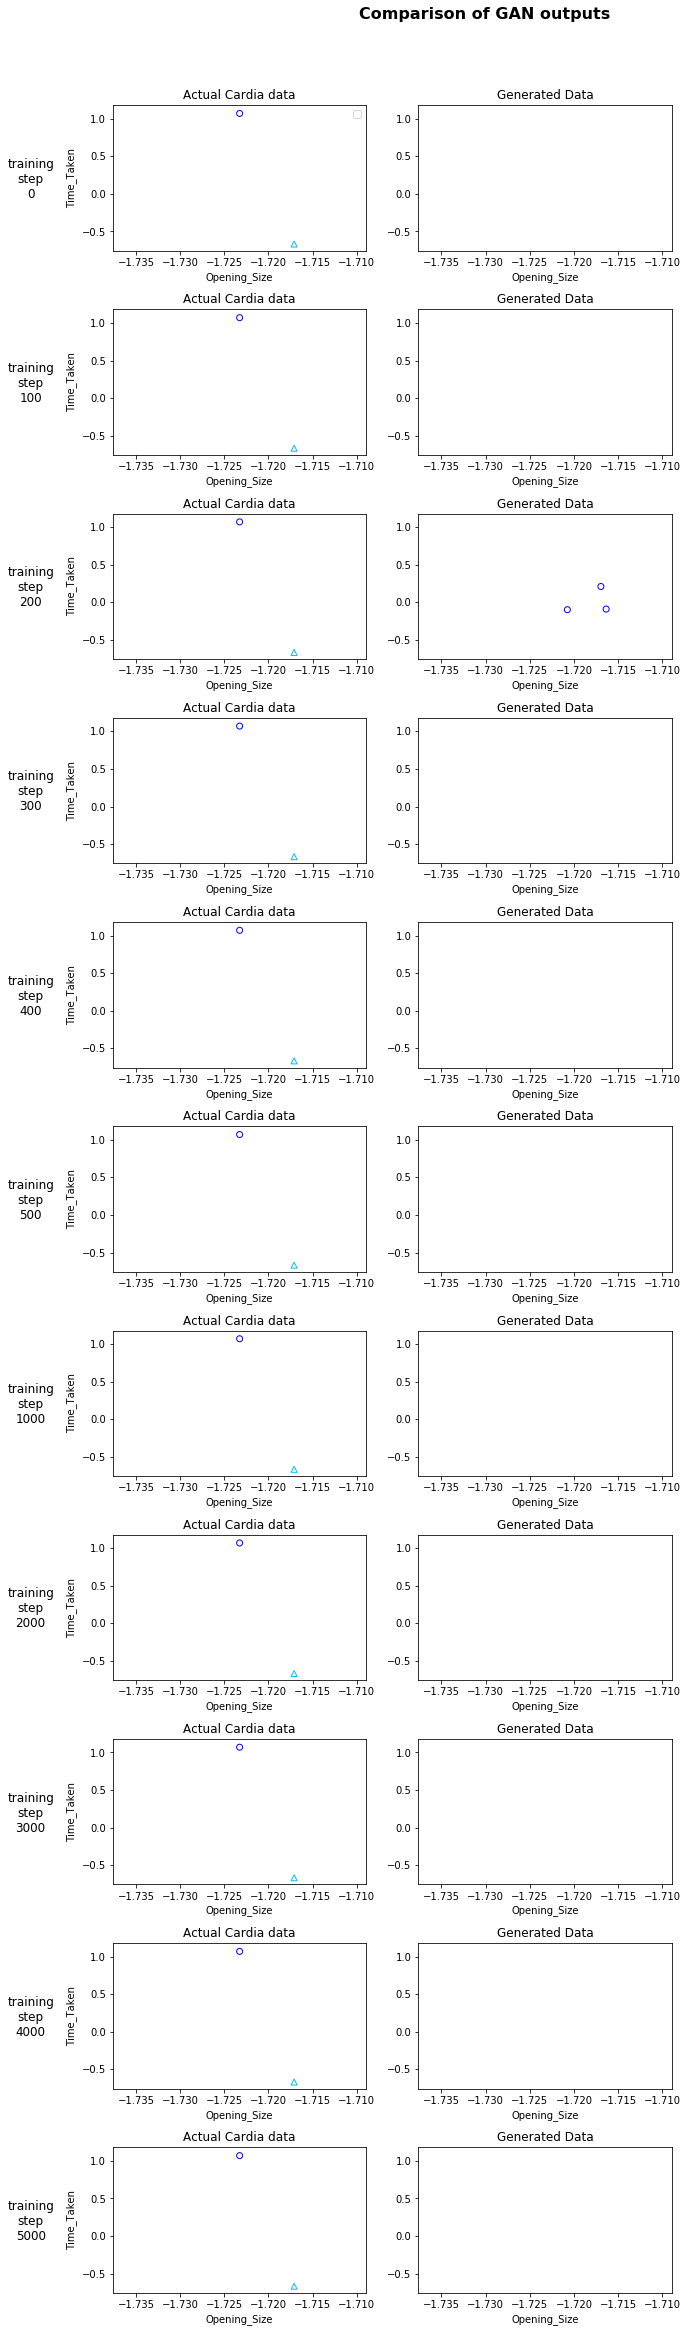

In [23]:
import matplotlib.pyplot as plt

# Setup parameters visualization parameters
seed = 17
test_size = 300 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['blue','deepskyblue']
markers = ['o','^']

col1, col2 = 'Opening_Size', 'Time_Taken'

base_dir = 'model_normalized/'

#Actual fraud data visualization
model_steps = [0,100, 200, 300, 400, 500, 1000, 2000,3000,4000,5000]
rows = len(model_steps)
columns = 3

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker in zip(real_samples.groupby('Opening_Size'), colors, markers):
        plt.scatter( group[1][[col1]], group[1][[col2]], marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Cardia data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    i=0
    [model_name, with_class, generator_model] = models['GAN']
    print(model_step)
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

    g_z = generator_model.predict(z)
    gen_samples = pd.DataFrame(g_z, columns=data_cols)
    gen_samples.to_csv('Generated_sample_normalized.csv')
    plt.scatter( gen_samples[[col1]], gen_samples[[col2]], marker=markers[0], edgecolors=colors[0], facecolors='none' )
    plt.title("Generated Data")   
    plt.xlabel(data_cols[0])
    ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

In [24]:
gen_df = pd.read_csv("Generated_sample_larger.csv")

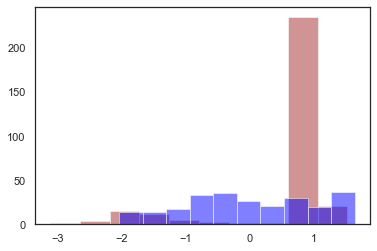

In [33]:
plt.hist(gen_df['Time_Taken'],alpha=0.5, color='brown')
plt.hist(df['Time_Taken'],alpha=0.5,color='blue')
plt.show()

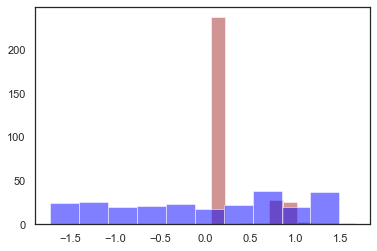

In [34]:
plt.hist(gen_df['Number_of_collisions'],alpha=0.5, color='brown')
plt.hist(df['Number_of_collisions'],alpha=0.5, color ='blue')
plt.show()

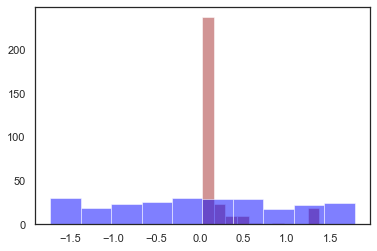

In [35]:
plt.hist(gen_df['Opening_Size'],alpha=0.5, color ='brown')
plt.hist(df['Opening_Size'],alpha=0.5, color='blue')
plt.show()

In [67]:
!pip install table_evaluator

In [28]:
gen_df.drop('Unnamed: 0', axis=1, inplace=True)
print(gen_df.columns)
print(df.shape, gen_df.shape)

Index(['Opening_Size', 'Time_Taken', 'Number_of_collisions', 'grade'], dtype='object')
(249, 4) (300, 4)


249 300


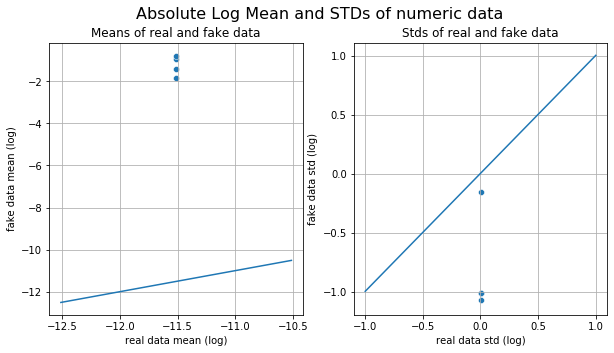

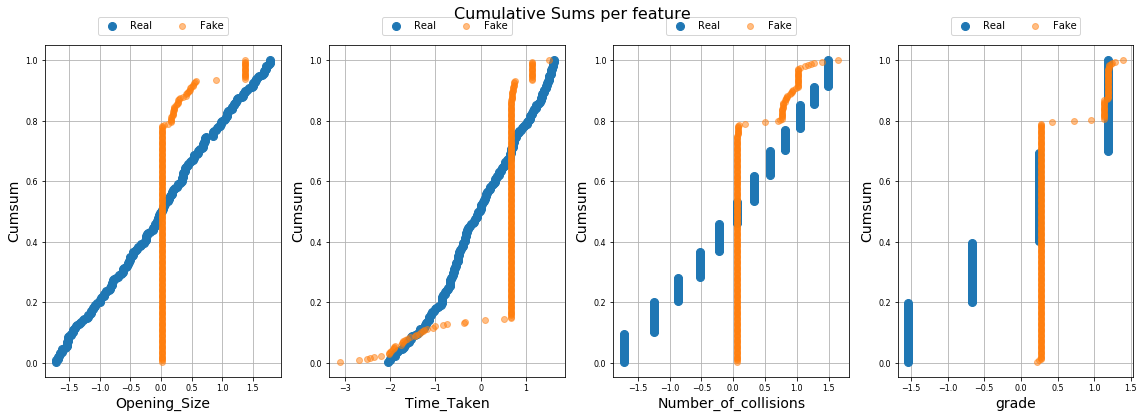

D:\Users\Rajat Paliwal\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Rajat Paliwal\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Rajat Paliwal\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

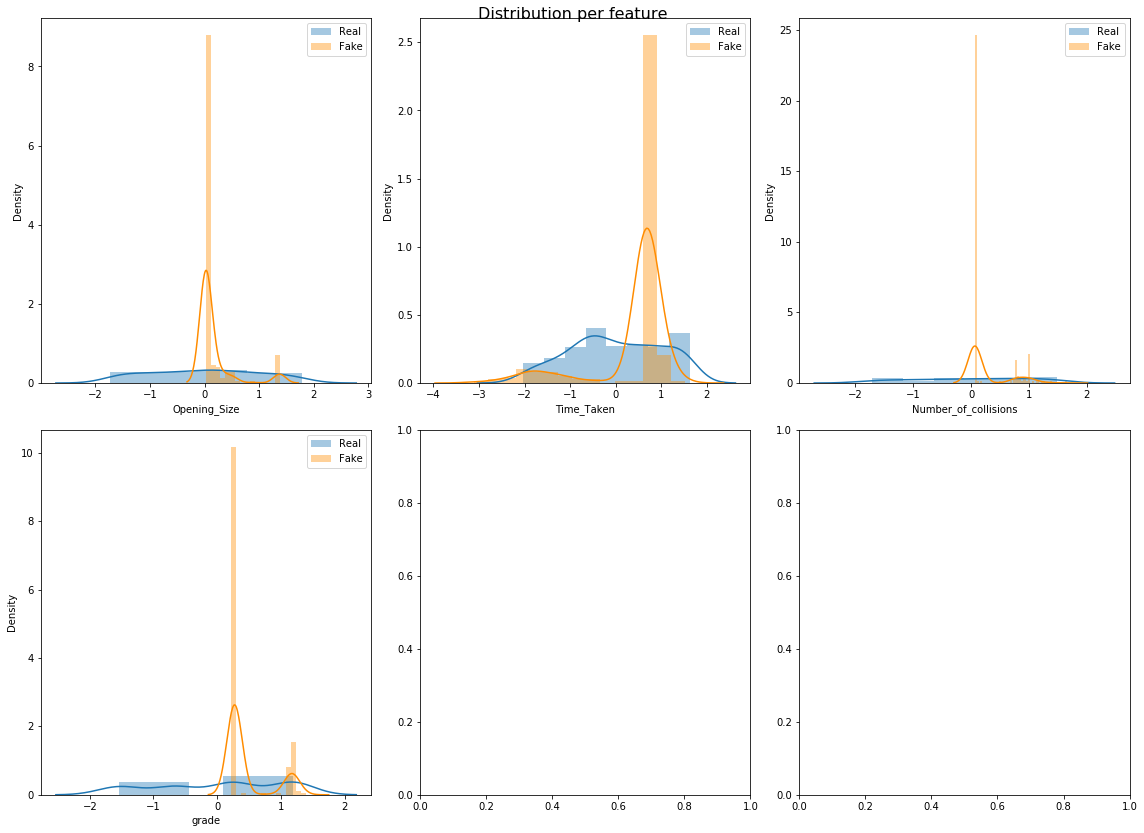

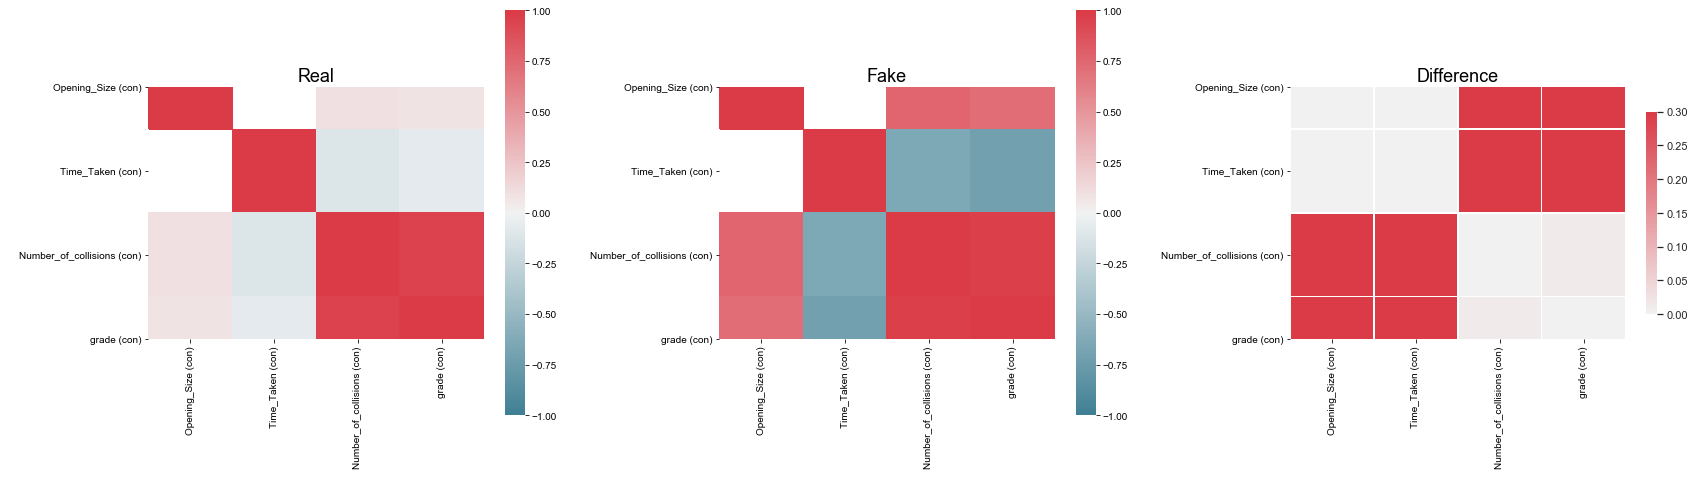

LinAlgError: SVD did not converge

In [29]:
from table_evaluator import load_data, TableEvaluator

cat_cols = ['Opening_Size', 'Time_Taken', 'Number_of_collision']

print(len(df), len(gen_df))
table_evaluator =  TableEvaluator(df, gen_df)

table_evaluator.visual_evaluation()

In [30]:
#gen_df.grade= gen_df.grade.round()
#gen_df.Number_of_collisions= gen_df.Number_of_collisions.round()
#display(gen_df.head(n=10))

,Opening_Size,Time_Taken,Number_of_collisions,grade
0,-0.043819,23.577850,0.0,-0.0
1,0.467248,28.903763,10.0,3.0
2,0.439644,25.279882,13.0,3.0
3,-0.073446,21.297745,1.0,-0.0
4,0.120047,23.759983,5.0,2.0
5,0.146815,29.640965,6.0,1.0
6,0.031261,28.751902,6.0,1.0
7,0.419256,28.932764,8.0,2.0
8,0.475296,31.677082,12.0,3.0
9,0.011881,35.332540,6.0,2.0


In [30]:
synthetic_ga = gen_df['grade']
synthetic_raw_features= gen_df.drop('grade', axis=1)
display(synthetic_raw_features.head(n=10))

,Opening_Size,Time_Taken,Number_of_collisions
0,0.022960,0.675704,0.064438
1,0.022960,0.675704,0.064438
2,0.417289,-1.424034,0.786923
3,1.372360,1.131782,1.010362
4,0.192258,-2.034915,0.924623
5,0.556901,-0.732322,0.980779
6,0.021941,0.731945,0.069164
7,0.022960,0.675704,0.064438
8,0.022960,0.675704,0.064438
9,0.022960,0.675704,0.064438


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(synthetic_raw_features,
                                                 synthetic_ga,
                                                 test_size=0.2,
                                                 random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 240 samples.
Testing set has 60 samples.


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
model= (LogisticRegression())
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

ValueError: Unknown label type: 'continuous'

In [34]:
#accuracy while testing with synthetic dataset only
model.score(X_test, y_test)

0.8333333333333334

In [35]:
real_ga = df['grade']
real_raw_features= df.drop('grade', axis=1)
display(real_raw_features.head(n=10))

,Opening_Size,Time_Taken,Number_of_collisions
0,0.045034,13.535900,0
1,0.045251,18.450730,4
2,0.045583,25.961040,11
3,0.044937,5.992819,8
4,0.045347,7.917220,1
5,0.045378,35.173630,6
6,0.044836,10.304590,5
7,0.045074,8.001000,7
8,0.044364,26.189700,1
9,0.044655,15.627000,7


In [36]:
from sklearn.model_selection import train_test_split
X_real_train, X_real_test,y_real_train, y_real_test= train_test_split(real_raw_features,
                                                 real_ga,
                                                 test_size=0.2,
                                                 random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 240 samples.
Testing set has 60 samples.


In [37]:
y_real_pred=model.predict(X_real_test)
print(y_real_pred)
#accuracy while testing the accuracy of model trained on synthetic dataset and predicting on real dataset 
model.score(X_real_test, y_real_test)

[ 1.  3.  3.  3.  2.  3.  1.  3. -0.  1.  3.  2.  3.  1.  1.  2.  3.  3.
  1.  3.  1. -0.  3.  3.  1.  1. -0.  2.  2.  1. -0. -0.  3.  1.  3.  2.
  3. -0.  3.  2.  1.  2.  1.  3. -0. -0. -0.  2. -0. -0.]


0.68

In [38]:
#Now checking with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[-0.  1. -0.  1.  2.  3.  2.  3. -0.  3.  2.  1.  2.  3. -0.  2.  3.  2.
 -0.  1.  2.  2.  3. -0.  1.  3.  2.  1.  3.  1.  2. -0.  3.  1.  1.  3.
  3.  2.  2.  2.  2.  1.  2.  2.  2. -0.  2.  3.  2.  2.  3.  2.  3.  1.
  2. -0. -0.  2. -0.  3.]


In [39]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [40]:
y_real_pred=clf.predict(X_real_test)
print(y_real_pred)
#accuracy while testing the accuracy of model trained on synthetic dataset and predicting on real dataset 
print("Accuracy:",metrics.accuracy_score(y_real_test, y_real_pred))

[ 1.  3.  3.  3.  2.  3.  1.  3.  1. -0.  3.  2.  3.  1.  1.  1.  3.  2.
  1.  3.  1. -0.  3.  3.  1.  1.  1.  2.  2.  1. -0. -0.  2.  1.  1.  2.
  3. -0.  3.  2.  1.  2.  1.  3. -0.  1. -0.  2.  1. -0.]
Accuracy: 0.68


In [41]:
# Trying KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.8

In [42]:
knn_classifier.score(X_real_test,y_real_test)

0.68

In [43]:
classifiers = ['LogisticRegression','RandomForestClassifier','KNN']
n = len(classifiers)
synthetic_scores= [0.68,0.68,0.68]
real_scores=[0.833,0.86,0.8]

classifier_df= pd.DataFrame( index=classifiers)
classifier_df['synthetic']= synthetic_scores
classifier_df['real']= real_scores
classifier_df

,synthetic,real
LogisticRegression,0.68,0.833
RandomForestClassifier,0.68,0.860
KNN,0.68,0.800


1). Normalizing the dataset may help in better training of the model but it also brings down the importance of a particular feature on the final prediction. It equalizes the playing field.
2). Multi class classification is difficult to be performed on the normalized data as the values become continuous.
3). IF going through normalizng the data before training its better to rescale the data or the output .
4). 


1).Synthetic data can be generated using GANs.
2). The data generated using GANs seems to have the similar distribution of data as the original data, which helps in generating similar data.
3). Some of the important features such as number of collision and grade are required in the discreet form and they are being generated continuous , so the GANs need a fine tuning in that part.
4). The accuracy of the model trained on synthetic dataset and when tested on real dataset is low as it is close to 0.68 , so improvement required on that front too.